## Lý thuyết

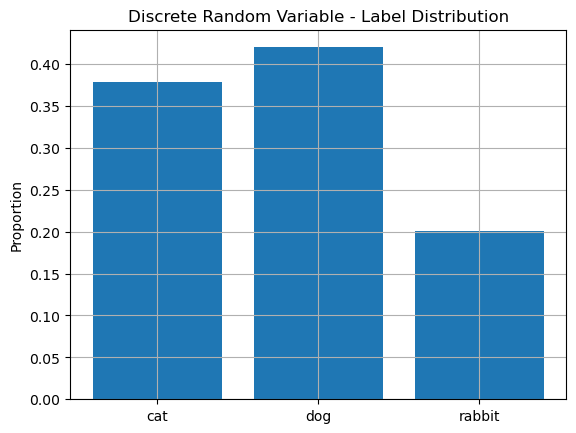

In [2]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.random.choice(['cat', 'dog', 'rabbit'], size = 1000, p = [0.4, 0.4 , 0.2])
unique, counts = np.unique(labels, return_counts = True)

plt.bar(unique, counts/len(labels))
plt.title("Discrete Random Variable - Label Distribution")
plt.ylabel("Proportion")
plt.grid(True)
plt.show()

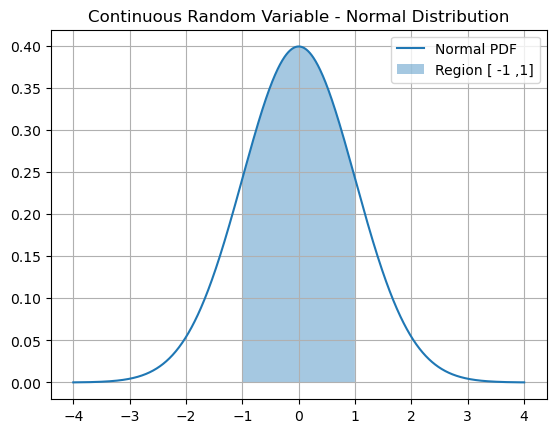

In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, loc = 0, scale = 1)

plt.plot(x, pdf, label = "Normal PDF")
plt.fill_between(x, pdf, where = (x > -1) & (x < 1), alpha = 0.4, label = "Region [ -1 ,1]")
plt.title("Continuous Random Variable - Normal Distribution")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples = 1000, n_features = 10, n_classes = 2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))


Accuracy : 0.8766666666666667


In [8]:
mu = np.zeros(10)
sigma = np.ones(10)
eps = np.random.normal(size = 10)
z = mu + sigma * eps
print("Sampled latent vector z:", z)


Sampled latent vector z: [-0.96000812 -0.93214928  0.10788084 -1.38512589  1.68628891 -1.06139363
  0.12263665  0.0027828  -0.69785956 -1.31494427]
